In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

## Workflow whould be;; START -> calculate_bmi -> END

* START and END are dummy nodes which tell workflow from where graph start and end

## 1.Define state (so we define state using class) -> inherite with typedict class

In [11]:
class BMIState(TypedDict):
    height_m:float
    weight_kg: float
    bmi: float
    category: str

In [4]:
## this is node fn ;; and you should remember that when a node is execuated then it's fn get state as it's argument automentically so tell fn that it's arg will be that state type
## and after execution that node also return state as it's output

def calculate_bmi(state: BMIState) -> BMIState:
    weight= state['weight_kg']
    height= state['height_m']

    bmi= weight/height**2

    state['bmi']= round(bmi, 2)

    return state


## 2. Define your graph

In [5]:
# first need to build a graph object -> using StateGraph -> always give state as it input
graph= StateGraph(BMIState)

# add nodes to your graph
# so using ''add_node'' fn we give name to that node as it's argument -> ''calculate_bmi'' , and give second arg as that fn , which is called when that node is execuated ;; let name of the that fn is also (calculate_bmi)

graph.add_node('calculate_bmi', calculate_bmi)

# add edges to your graph
# 1. first edge is between START -> calculate_bmi
graph.add_edge(START, 'calculate_bmi')

# 2. second edge is between calculate_bmi -> END

graph.add_edge('calculate_bmi', END)

# compile the graph (making complete graph to it can be understood by langgraph) --> using fn -> **.compile** fn
workflow= graph.compile() ## we get a compiled obj// or now it is a runnable



In [14]:
# execute the graph
intial_state= {"weight_kg":80, "height_m":1.73}
output_state= workflow.invoke(intial_state)
## graph output will also be that state

In [15]:
output_state

{'height_m': 1.73, 'weight_kg': 80, 'bmi': 26.73}

## Interesting thing is you can view your graph

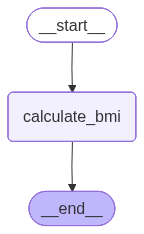

In [6]:
# pick this code from langgraph documentation

from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())

### make it some more complicated

In [12]:
## what ever bmi value we are getting on the basis of that we just want to tell that person is fit, overweight, obease
## it just means we have to add one more node
## START -> Calcuate_bmi -> Label_bmi -> END

## define label bmi node fn

def label_bmi(state: BMIState) -> BMIState:
  bmi= state['bmi']

  if bmi<18.5:
    state['category']= 'Underweight'
  elif 18.5 <= bmi <= 25:
    state['category']= "Normal"
  elif 25 <= bmi <30:
    state['category']= "Overweight"
  else:
    state['category']= "Obese"
  return state 


## def graph
graph1= StateGraph(BMIState)

## add calcuate bmi node
graph1.add_node('calculate_bmi', calculate_bmi)

## add label node
graph1.add_node('label_bmi', label_bmi)

## add first edge
graph1.add_edge(START, 'calculate_bmi')

## add second edge
graph1.add_edge('calculate_bmi', 'label_bmi')

## add third edge
graph1.add_edge('label_bmi', END)

## compile the graph
workflow1= graph1.compile()


In [13]:
intial_state= {"weight_kg":70, "height_m":1.83}

final_state1= workflow1.invoke(intial_state)

final_state1

{'height_m': 1.83, 'weight_kg': 70, 'bmi': 20.9, 'category': 'Normal'}

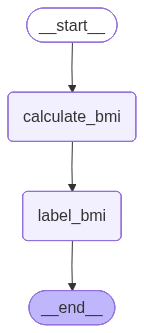

In [10]:
Image(workflow1.get_graph().draw_mermaid_png())